In [101]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
plt.style.use('default')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [75]:
def getData(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_NaNmean.csv')
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/valid_data_NaNmean.csv')
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values

    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]

    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getDataNormalization(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_Normalization.csv')
    #X_train = train_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_valid.csv')
    #X_valid = valid_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values
    
    # label should be int
    y_train = np.floor(y_train + 1.1).astype(int)
    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]
    
    # label should be int
    y_valid = np.floor(y_valid + 1.1).astype(int)
    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

In [78]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
tf.keras.backend.clear_session()
model = Sequential()

activation = 'relu'
model.add(Dense(16, input_shape=(7,), activation = activation, kernel_initializer=None, ))
model.add(BatchNormalization())
model.add(Dense(16, activation = activation))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.1)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_valid, y_valid))

C:\Users\MrBinh\.conda\envs\Binh_python7\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                128       
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 579
Trainable params: 515
Non-trainable params: 64
_________________________________________________________________
None
Epoch 1/100
4/4 [==============================] - 1s 77ms/step - loss: 0.6823 - accuracy: 0.7200 - val_loss: 0.1621 -

4/4 [==============================] - 0s 9ms/step - loss: 0.2196 - accuracy: 0.9800 - val_loss: 0.0987 - val_accuracy: 1.0000
Epoch 53/100
4/4 [==============================] - 0s 10ms/step - loss: 0.3037 - accuracy: 0.9600 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 54/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1062 - accuracy: 0.9800 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 55/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0542 - accuracy: 0.9800 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 56/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1915 - accuracy: 0.9800 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 57/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0876 - accuracy: 0.9800 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 58/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 59/100
4/4 [=============

In [74]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((50, 5), (50, 3), (68, 5), (68, 3))

In [29]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((110, 7), (110, 2), (68, 7), (68, 2))

In [60]:
X_train

array([[ 1.39206105,  1.02151552, -0.01107447, -0.2652594 , -1.08911786],
       [ 0.67996266, -1.22110911,  1.16558801,  0.87319297,  0.78867155],
       [-0.89030557,  0.34872813, -1.39538328, -0.63525642,  0.78867155],
       [ 2.19545409,  1.47004044,  0.40421817, -0.20833678, -1.08911786],
       [ 0.5338912 ,  0.40479374, -0.42636711, -1.00525344,  0.78867155],
       [ 0.44259653, -1.27717472,  1.37323434,  1.2716513 , -1.08911786],
       [ 0.2600072 , -0.77258418,  0.95794169,  1.2716513 , -1.08911786],
       [ 0.4791144 ,  0.79725305, -0.77244431, -0.83448559,  0.78867155],
       [-1.41981462,  0.34872813, -0.42636711, -0.83448559,  0.78867155],
       [ 0.314784  , -1.94996211,  0.88872625,  0.53165726,  0.78867155],
       [ 1.13643598, -0.4922561 ,  1.9961733 ,  1.72703225, -1.08911786],
       [-1.36503782,  1.30184359, -0.77244431, -0.43602726, -1.08911786],
       [-0.59816264,  0.9654499 , -1.46459872, -0.2652594 , -1.08911786],
       [-0.94508237, -0.0997968 , -0.9

In [41]:
def runANN(activation, epochs, lr, X_train, y_train, X_valid, y_valid, norm = False):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(16, input_shape=(7,), activation = activation))
    if norm:
        model.add(BatchNormalization())
    model.add(Dense(16, activation = activation))
    if norm:
        model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax', name='output'))

    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    #print(model.summary())

    history = model.fit(X_train,
        y_train,
        epochs=epochs,
        batch_size=16,
        validation_data=(X_valid, y_valid))
    
    return history

In [42]:
X_train, y_train, X_valid, y_valid = getData(50)
his_1 = runANN('relu', 1000, 0.1, X_train, y_train, X_valid, y_valid)
his_01 = runANN('relu', 1000, 0.01, X_train, y_train, X_valid, y_valid)
his_001 = runANN('relu', 1000, 0.001, X_train, y_train, X_valid, y_valid)

Epoch 1/1000
4/4 [==============================] - 0s 62ms/step - loss: 568.4099 - accuracy: 0.3800 - val_loss: 1.1301 - val_accuracy: 0.3676
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 7.9026 - accuracy: 0.2600 - val_loss: 1.0546 - val_accuracy: 0.4412
Epoch 3/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0681 - accuracy: 0.4400 - val_loss: 1.0484 - val_accuracy: 0.4412
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0690 - accuracy: 0.4400 - val_loss: 1.0474 - val_accuracy: 0.4412
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0684 - accuracy: 0.4400 - val_loss: 1.0470 - val_accuracy: 0.4412
Epoch 6/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0683 - accuracy: 0.4400 - val_loss: 1.0488 - val_accuracy: 0.4412
Epoch 7/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0680 - accuracy: 0.3400 - val_loss: 1.0526 - val_accuracy: 0.3676
Epoch 8/1000
4/4 

4/4 [==============================] - 0s 9ms/step - loss: 1.0725 - accuracy: 0.4400 - val_loss: 1.0600 - val_accuracy: 0.4412
Epoch 60/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0667 - accuracy: 0.4400 - val_loss: 1.0494 - val_accuracy: 0.4412
Epoch 61/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.0578 - accuracy: 0.4400 - val_loss: 1.0497 - val_accuracy: 0.4412
Epoch 62/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0686 - accuracy: 0.3800 - val_loss: 1.0548 - val_accuracy: 0.3676
Epoch 63/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0776 - accuracy: 0.3400 - val_loss: 1.0563 - val_accuracy: 0.3676
Epoch 64/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0851 - accuracy: 0.3400 - val_loss: 1.0581 - val_accuracy: 0.3676
Epoch 65/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0777 - accuracy: 0.3400 - val_loss: 1.0544 - val_accuracy: 0.3676
Epoch 66/1000
4/4 [========

4/4 [==============================] - 0s 9ms/step - loss: 1.0697 - accuracy: 0.4400 - val_loss: 1.0563 - val_accuracy: 0.4412
Epoch 118/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0709 - accuracy: 0.4400 - val_loss: 1.0626 - val_accuracy: 0.4412
Epoch 119/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0700 - accuracy: 0.4400 - val_loss: 1.0608 - val_accuracy: 0.4412
Epoch 120/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0664 - accuracy: 0.4400 - val_loss: 1.0586 - val_accuracy: 0.4412
Epoch 121/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0653 - accuracy: 0.4400 - val_loss: 1.0567 - val_accuracy: 0.4412
Epoch 122/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0669 - accuracy: 0.4400 - val_loss: 1.0607 - val_accuracy: 0.4412
Epoch 123/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0672 - accuracy: 0.4400 - val_loss: 1.0649 - val_accuracy: 0.4412
Epoch 124/1000
4/4 [=

Epoch 175/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0678 - accuracy: 0.4400 - val_loss: 1.0498 - val_accuracy: 0.4412
Epoch 176/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0628 - accuracy: 0.4400 - val_loss: 1.0483 - val_accuracy: 0.4412
Epoch 177/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0542 - val_accuracy: 0.3676
Epoch 178/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0767 - accuracy: 0.3400 - val_loss: 1.0586 - val_accuracy: 0.3676
Epoch 179/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0815 - accuracy: 0.3400 - val_loss: 1.0561 - val_accuracy: 0.3676
Epoch 180/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0805 - accuracy: 0.3400 - val_loss: 1.0497 - val_accuracy: 0.3676
Epoch 181/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0748 - accuracy: 0.4000 - val_loss: 1.0463 - val_accuracy: 0.4412
Epoch 

Epoch 233/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0663 - accuracy: 0.4400 - val_loss: 1.0454 - val_accuracy: 0.4412
Epoch 234/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0624 - accuracy: 0.4400 - val_loss: 1.0465 - val_accuracy: 0.4412
Epoch 235/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0629 - accuracy: 0.4400 - val_loss: 1.0475 - val_accuracy: 0.4412
Epoch 236/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0624 - accuracy: 0.4400 - val_loss: 1.0503 - val_accuracy: 0.4412
Epoch 237/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0672 - accuracy: 0.4400 - val_loss: 1.0490 - val_accuracy: 0.4412
Epoch 238/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0646 - accuracy: 0.4400 - val_loss: 1.0472 - val_accuracy: 0.4412
Epoch 239/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0485 - val_accuracy: 0.4412
Epoch 

Epoch 291/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0704 - accuracy: 0.4400 - val_loss: 1.0664 - val_accuracy: 0.4412
Epoch 292/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0708 - accuracy: 0.4400 - val_loss: 1.0735 - val_accuracy: 0.4412
Epoch 293/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0754 - accuracy: 0.4400 - val_loss: 1.0674 - val_accuracy: 0.4412
Epoch 294/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0694 - accuracy: 0.4400 - val_loss: 1.0547 - val_accuracy: 0.4412
Epoch 295/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0621 - accuracy: 0.4400 - val_loss: 1.0484 - val_accuracy: 0.4412
Epoch 296/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0637 - accuracy: 0.4400 - val_loss: 1.0464 - val_accuracy: 0.4412
Epoch 297/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0617 - accuracy: 0.4400 - val_loss: 1.0484 - val_accuracy: 0.4412
Epoch 

Epoch 349/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0642 - accuracy: 0.4400 - val_loss: 1.0508 - val_accuracy: 0.3676
Epoch 350/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0691 - accuracy: 0.3400 - val_loss: 1.0538 - val_accuracy: 0.3676
Epoch 351/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0807 - accuracy: 0.3400 - val_loss: 1.0591 - val_accuracy: 0.3676
Epoch 352/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0845 - accuracy: 0.3400 - val_loss: 1.0572 - val_accuracy: 0.3676
Epoch 353/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0790 - accuracy: 0.3400 - val_loss: 1.0481 - val_accuracy: 0.4412
Epoch 354/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0634 - accuracy: 0.4400 - val_loss: 1.0456 - val_accuracy: 0.4412
Epoch 355/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0654 - accuracy: 0.4400 - val_loss: 1.0489 - val_accuracy: 0.4412
Epoch 

Epoch 407/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0657 - accuracy: 0.4400 - val_loss: 1.0485 - val_accuracy: 0.4412
Epoch 408/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0645 - accuracy: 0.4400 - val_loss: 1.0464 - val_accuracy: 0.4412
Epoch 409/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0622 - accuracy: 0.4400 - val_loss: 1.0458 - val_accuracy: 0.4412
Epoch 410/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0604 - accuracy: 0.4400 - val_loss: 1.0479 - val_accuracy: 0.4412
Epoch 411/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0621 - accuracy: 0.4400 - val_loss: 1.0513 - val_accuracy: 0.4412
Epoch 412/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0634 - accuracy: 0.4400 - val_loss: 1.0508 - val_accuracy: 0.4412
Epoch 413/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0658 - accuracy: 0.4400 - val_loss: 1.0477 - val_accuracy: 0.4412
Epoch 

Epoch 465/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0737 - accuracy: 0.3000 - val_loss: 1.0493 - val_accuracy: 0.3676
Epoch 466/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0730 - accuracy: 0.3400 - val_loss: 1.0509 - val_accuracy: 0.3676
Epoch 467/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0733 - accuracy: 0.3400 - val_loss: 1.0481 - val_accuracy: 0.4412
Epoch 468/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0686 - accuracy: 0.4400 - val_loss: 1.0470 - val_accuracy: 0.4412
Epoch 469/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0684 - accuracy: 0.4400 - val_loss: 1.0517 - val_accuracy: 0.4412
Epoch 470/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0514 - val_accuracy: 0.4412
Epoch 471/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0621 - accuracy: 0.4400 - val_loss: 1.0528 - val_accuracy: 0.4412
Epoch 

Epoch 523/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0654 - accuracy: 0.4400 - val_loss: 1.0531 - val_accuracy: 0.4412
Epoch 524/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0643 - accuracy: 0.4400 - val_loss: 1.0530 - val_accuracy: 0.4412
Epoch 525/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0638 - accuracy: 0.4400 - val_loss: 1.0507 - val_accuracy: 0.4412
Epoch 526/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0642 - accuracy: 0.4400 - val_loss: 1.0530 - val_accuracy: 0.4412
Epoch 527/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0627 - accuracy: 0.4400 - val_loss: 1.0519 - val_accuracy: 0.4412
Epoch 528/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0638 - accuracy: 0.4400 - val_loss: 1.0547 - val_accuracy: 0.4412
Epoch 529/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0563 - val_accuracy: 0.4412
Epoch 

Epoch 581/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0695 - accuracy: 0.4400 - val_loss: 1.0480 - val_accuracy: 0.4412
Epoch 582/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0748 - accuracy: 0.4400 - val_loss: 1.0493 - val_accuracy: 0.4412
Epoch 583/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0780 - accuracy: 0.3800 - val_loss: 1.0540 - val_accuracy: 0.3676
Epoch 584/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0840 - accuracy: 0.3400 - val_loss: 1.0565 - val_accuracy: 0.3676
Epoch 585/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0875 - accuracy: 0.3400 - val_loss: 1.0571 - val_accuracy: 0.3676
Epoch 586/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0851 - accuracy: 0.3400 - val_loss: 1.0482 - val_accuracy: 0.4412
Epoch 587/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0693 - accuracy: 0.4400 - val_loss: 1.0455 - val_accuracy: 0.4412
Epoch 

Epoch 639/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0495 - val_accuracy: 0.4412
Epoch 640/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0629 - accuracy: 0.4400 - val_loss: 1.0507 - val_accuracy: 0.4412
Epoch 641/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0498 - val_accuracy: 0.4412
Epoch 642/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0483 - val_accuracy: 0.4412
Epoch 643/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0618 - accuracy: 0.4400 - val_loss: 1.0505 - val_accuracy: 0.4412
Epoch 644/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0669 - accuracy: 0.4400 - val_loss: 1.0545 - val_accuracy: 0.4412
Epoch 645/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0627 - accuracy: 0.4400 - val_loss: 1.0499 - val_accuracy: 0.4412
Epoch 

Epoch 697/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0737 - accuracy: 0.4400 - val_loss: 1.0683 - val_accuracy: 0.4412
Epoch 698/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0853 - accuracy: 0.4400 - val_loss: 1.0753 - val_accuracy: 0.4412
Epoch 699/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0847 - accuracy: 0.4400 - val_loss: 1.0695 - val_accuracy: 0.4412
Epoch 700/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0720 - accuracy: 0.4400 - val_loss: 1.0503 - val_accuracy: 0.4412
Epoch 701/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0454 - val_accuracy: 0.4412
Epoch 702/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0638 - accuracy: 0.4400 - val_loss: 1.0479 - val_accuracy: 0.4412
Epoch 703/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0745 - accuracy: 0.3600 - val_loss: 1.0494 - val_accuracy: 0.3676
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 1.0702 - accuracy: 0.4200 - val_loss: 1.0514 - val_accuracy: 0.4412
Epoch 755/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0657 - accuracy: 0.4400 - val_loss: 1.0529 - val_accuracy: 0.4412
Epoch 756/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0635 - accuracy: 0.4400 - val_loss: 1.0500 - val_accuracy: 0.4412
Epoch 757/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0653 - accuracy: 0.4400 - val_loss: 1.0483 - val_accuracy: 0.4412
Epoch 758/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0612 - accuracy: 0.4400 - val_loss: 1.0522 - val_accuracy: 0.4412
Epoch 759/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0635 - accuracy: 0.4400 - val_loss: 1.0527 - val_accuracy: 0.4412
Epoch 760/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0519 - val_accuracy: 0.4412
Epoch 761/1000
4/4 [

Epoch 812/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0606 - val_accuracy: 0.4412
Epoch 813/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0695 - accuracy: 0.4400 - val_loss: 1.0703 - val_accuracy: 0.4412
Epoch 814/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0762 - accuracy: 0.4400 - val_loss: 1.0765 - val_accuracy: 0.4412
Epoch 815/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0858 - accuracy: 0.4400 - val_loss: 1.0833 - val_accuracy: 0.4412
Epoch 816/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0864 - accuracy: 0.4400 - val_loss: 1.0764 - val_accuracy: 0.4412
Epoch 817/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0767 - accuracy: 0.4400 - val_loss: 1.0658 - val_accuracy: 0.4412
Epoch 818/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0706 - accuracy: 0.4400 - val_loss: 1.0567 - val_accuracy: 0.4412
Epoch 

Epoch 870/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0646 - accuracy: 0.4400 - val_loss: 1.0472 - val_accuracy: 0.4412
Epoch 871/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0641 - accuracy: 0.4400 - val_loss: 1.0459 - val_accuracy: 0.4412
Epoch 872/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0694 - accuracy: 0.4400 - val_loss: 1.0455 - val_accuracy: 0.4412
Epoch 873/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0641 - accuracy: 0.4400 - val_loss: 1.0456 - val_accuracy: 0.4412
Epoch 874/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0630 - accuracy: 0.4400 - val_loss: 1.0458 - val_accuracy: 0.4412
Epoch 875/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0472 - val_accuracy: 0.4412
Epoch 876/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0629 - accuracy: 0.4400 - val_loss: 1.0513 - val_accuracy: 0.4412
Epoch 

Epoch 928/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0717 - accuracy: 0.4400 - val_loss: 1.0750 - val_accuracy: 0.4412
Epoch 929/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0821 - accuracy: 0.4400 - val_loss: 1.0839 - val_accuracy: 0.4412
Epoch 930/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0821 - accuracy: 0.4400 - val_loss: 1.0749 - val_accuracy: 0.4412
Epoch 931/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0707 - accuracy: 0.4400 - val_loss: 1.0660 - val_accuracy: 0.4412
Epoch 932/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0665 - accuracy: 0.4400 - val_loss: 1.0553 - val_accuracy: 0.4412
Epoch 933/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0760 - accuracy: 0.3600 - val_loss: 1.0592 - val_accuracy: 0.3676
Epoch 934/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0767 - accuracy: 0.3400 - val_loss: 1.0656 - val_accuracy: 0.3676
Epoch 

Epoch 986/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0722 - accuracy: 0.4400 - val_loss: 1.0612 - val_accuracy: 0.4412
Epoch 987/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0780 - accuracy: 0.4400 - val_loss: 1.0572 - val_accuracy: 0.4412
Epoch 988/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0778 - accuracy: 0.4400 - val_loss: 1.0517 - val_accuracy: 0.4412
Epoch 989/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0738 - accuracy: 0.4400 - val_loss: 1.0486 - val_accuracy: 0.4412
Epoch 990/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0690 - accuracy: 0.4400 - val_loss: 1.0514 - val_accuracy: 0.4412
Epoch 991/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0735 - accuracy: 0.4400 - val_loss: 1.0618 - val_accuracy: 0.4412
Epoch 992/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0821 - accuracy: 0.4400 - val_loss: 1.0674 - val_accuracy: 0.4412
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 13.3776 - accuracy: 0.3400 - val_loss: 10.0263 - val_accuracy: 0.4412
Epoch 44/1000
4/4 [==============================] - 0s 9ms/step - loss: 7.0521 - accuracy: 0.4200 - val_loss: 8.6794 - val_accuracy: 0.2353
Epoch 45/1000
4/4 [==============================] - 0s 9ms/step - loss: 6.0524 - accuracy: 0.4000 - val_loss: 7.7678 - val_accuracy: 0.3824
Epoch 46/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.3299 - accuracy: 0.4200 - val_loss: 5.4496 - val_accuracy: 0.2500
Epoch 47/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.6968 - accuracy: 0.4800 - val_loss: 4.2931 - val_accuracy: 0.7353
Epoch 48/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.9857 - accuracy: 0.5200 - val_loss: 0.9170 - val_accuracy: 0.7206
Epoch 49/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.0447 - accuracy: 0.6800 - val_loss: 6.1039 - val_accuracy: 0.4706
Epoch 50/1000
4/4 [======

4/4 [==============================] - 0s 9ms/step - loss: 7.8803 - accuracy: 0.3800 - val_loss: 7.1677 - val_accuracy: 0.4412
Epoch 102/1000
4/4 [==============================] - 0s 9ms/step - loss: 7.2066 - accuracy: 0.5600 - val_loss: 13.9983 - val_accuracy: 0.3676
Epoch 103/1000
4/4 [==============================] - 0s 9ms/step - loss: 9.6361 - accuracy: 0.4000 - val_loss: 2.2699 - val_accuracy: 0.4706
Epoch 104/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.0802 - accuracy: 0.5400 - val_loss: 10.8295 - val_accuracy: 0.3971
Epoch 105/1000
4/4 [==============================] - 0s 9ms/step - loss: 5.8230 - accuracy: 0.5400 - val_loss: 13.7142 - val_accuracy: 0.4559
Epoch 106/1000
4/4 [==============================] - 0s 9ms/step - loss: 12.9567 - accuracy: 0.4600 - val_loss: 1.4967 - val_accuracy: 0.5294
Epoch 107/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.4989 - accuracy: 0.6000 - val_loss: 2.7179 - val_accuracy: 0.5588
Epoch 108/1000
4/

Epoch 159/1000
4/4 [==============================] - 0s 9ms/step - loss: 7.1030 - accuracy: 0.4200 - val_loss: 6.2837 - val_accuracy: 0.4412
Epoch 160/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.7900 - accuracy: 0.4400 - val_loss: 8.5480 - val_accuracy: 0.4412
Epoch 161/1000
4/4 [==============================] - 0s 9ms/step - loss: 7.5153 - accuracy: 0.4000 - val_loss: 5.9152 - val_accuracy: 0.4559
Epoch 162/1000
4/4 [==============================] - 0s 9ms/step - loss: 5.2301 - accuracy: 0.4800 - val_loss: 5.5754 - val_accuracy: 0.2647
Epoch 163/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.8224 - accuracy: 0.6000 - val_loss: 4.8481 - val_accuracy: 0.6912
Epoch 164/1000
4/4 [==============================] - 0s 9ms/step - loss: 5.6596 - accuracy: 0.6400 - val_loss: 3.6369 - val_accuracy: 0.6618
Epoch 165/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.6374 - accuracy: 0.3800 - val_loss: 5.2007 - val_accuracy: 0.4706
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 1.4217 - accuracy: 0.5800 - val_loss: 3.8050 - val_accuracy: 0.5441
Epoch 217/1000
4/4 [==============================] - 0s 9ms/step - loss: 5.9263 - accuracy: 0.4600 - val_loss: 0.9464 - val_accuracy: 0.7206
Epoch 218/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.7040 - accuracy: 0.6000 - val_loss: 1.0691 - val_accuracy: 0.6176
Epoch 219/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5163 - accuracy: 0.5600 - val_loss: 1.5888 - val_accuracy: 0.6912
Epoch 220/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.8680 - accuracy: 0.7200 - val_loss: 2.4268 - val_accuracy: 0.3971
Epoch 221/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.4700 - accuracy: 0.5600 - val_loss: 1.5263 - val_accuracy: 0.6912
Epoch 222/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0014 - accuracy: 0.7000 - val_loss: 2.2062 - val_accuracy: 0.3382
Epoch 223/1000
4/4 [=

Epoch 274/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7837 - accuracy: 0.5800 - val_loss: 0.6524 - val_accuracy: 0.7059
Epoch 275/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7584 - accuracy: 0.7200 - val_loss: 0.6651 - val_accuracy: 0.6324
Epoch 276/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9045 - accuracy: 0.4800 - val_loss: 1.2285 - val_accuracy: 0.3088
Epoch 277/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9232 - accuracy: 0.5800 - val_loss: 0.8838 - val_accuracy: 0.6765
Epoch 278/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7380 - accuracy: 0.7000 - val_loss: 0.6342 - val_accuracy: 0.7353
Epoch 279/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.6764 - accuracy: 0.6200 - val_loss: 0.6768 - val_accuracy: 0.7059
Epoch 280/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.6518 - accuracy: 0.6800 - val_loss: 0.6549 - val_accuracy: 0.7059
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 1.0836 - accuracy: 0.4400 - val_loss: 1.0765 - val_accuracy: 0.4412
Epoch 332/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0810 - accuracy: 0.4400 - val_loss: 1.0746 - val_accuracy: 0.4412
Epoch 333/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0794 - accuracy: 0.4400 - val_loss: 1.0730 - val_accuracy: 0.4412
Epoch 334/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0778 - accuracy: 0.4400 - val_loss: 1.0707 - val_accuracy: 0.4412
Epoch 335/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0764 - accuracy: 0.4400 - val_loss: 1.0691 - val_accuracy: 0.4412
Epoch 336/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0753 - accuracy: 0.4400 - val_loss: 1.0681 - val_accuracy: 0.4412
Epoch 337/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0745 - accuracy: 0.4400 - val_loss: 1.0672 - val_accuracy: 0.4412
Epoch 338/1000
4/4 [=

Epoch 389/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0505 - val_accuracy: 0.4412
Epoch 390/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0509 - val_accuracy: 0.4412
Epoch 391/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0516 - val_accuracy: 0.4412
Epoch 392/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0524 - val_accuracy: 0.4412
Epoch 393/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0529 - val_accuracy: 0.4412
Epoch 394/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0624 - accuracy: 0.4400 - val_loss: 1.0531 - val_accuracy: 0.4412
Epoch 395/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0530 - val_accuracy: 0.4412
Epoch 

Epoch 447/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0621 - accuracy: 0.4400 - val_loss: 1.0510 - val_accuracy: 0.4412
Epoch 448/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0622 - accuracy: 0.4400 - val_loss: 1.0506 - val_accuracy: 0.4412
Epoch 449/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0506 - val_accuracy: 0.4412
Epoch 450/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0503 - val_accuracy: 0.4412
Epoch 451/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0500 - val_accuracy: 0.4412
Epoch 452/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0497 - val_accuracy: 0.4412
Epoch 453/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0613 - accuracy: 0.4400 - val_loss: 1.0493 - val_accuracy: 0.4412
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0501 - val_accuracy: 0.4412
Epoch 505/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0617 - accuracy: 0.4400 - val_loss: 1.0505 - val_accuracy: 0.4412
Epoch 506/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0617 - accuracy: 0.4400 - val_loss: 1.0505 - val_accuracy: 0.4412
Epoch 507/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0616 - accuracy: 0.4400 - val_loss: 1.0508 - val_accuracy: 0.4412
Epoch 508/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0616 - accuracy: 0.4400 - val_loss: 1.0511 - val_accuracy: 0.4412
Epoch 509/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0620 - accuracy: 0.4400 - val_loss: 1.0515 - val_accuracy: 0.4412
Epoch 510/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0518 - val_accuracy: 0.4412
Epoch 511/1000
4/4 [=

Epoch 562/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0616 - accuracy: 0.4400 - val_loss: 1.0507 - val_accuracy: 0.4412
Epoch 563/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0616 - accuracy: 0.4400 - val_loss: 1.0507 - val_accuracy: 0.4412
Epoch 564/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0616 - accuracy: 0.4400 - val_loss: 1.0505 - val_accuracy: 0.4412
Epoch 565/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0507 - val_accuracy: 0.4412
Epoch 566/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0506 - val_accuracy: 0.4412
Epoch 567/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0617 - accuracy: 0.4400 - val_loss: 1.0504 - val_accuracy: 0.4412
Epoch 568/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0501 - val_accuracy: 0.4412
E

4/4 [==============================] - 0s 9ms/step - loss: 1.0622 - accuracy: 0.4400 - val_loss: 1.0532 - val_accuracy: 0.4412
Epoch 620/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0624 - accuracy: 0.4400 - val_loss: 1.0535 - val_accuracy: 0.4412
Epoch 621/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0533 - val_accuracy: 0.4412
Epoch 622/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0534 - val_accuracy: 0.4412
Epoch 623/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0537 - val_accuracy: 0.4412
Epoch 624/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0541 - val_accuracy: 0.4412
Epoch 625/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0628 - accuracy: 0.4400 - val_loss: 1.0544 - val_accuracy: 0.4412
Epoch 626/1000
4/4 [=

Epoch 677/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0524 - val_accuracy: 0.4412
Epoch 678/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0620 - accuracy: 0.4400 - val_loss: 1.0534 - val_accuracy: 0.4412
Epoch 679/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0537 - val_accuracy: 0.4412
Epoch 680/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0627 - accuracy: 0.4400 - val_loss: 1.0535 - val_accuracy: 0.4412
Epoch 681/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0534 - val_accuracy: 0.4412
Epoch 682/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0630 - accuracy: 0.4400 - val_loss: 1.0536 - val_accuracy: 0.4412
Epoch 683/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0537 - val_accuracy: 0.4412
Epoc

4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0499 - val_accuracy: 0.4412
Epoch 735/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0500 - val_accuracy: 0.4412
Epoch 736/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0617 - accuracy: 0.4400 - val_loss: 1.0499 - val_accuracy: 0.4412
Epoch 737/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0499 - val_accuracy: 0.4412
Epoch 738/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0613 - accuracy: 0.4400 - val_loss: 1.0500 - val_accuracy: 0.4412
Epoch 739/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0503 - val_accuracy: 0.4412
Epoch 740/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0618 - accuracy: 0.4400 - val_loss: 1.0503 - val_accuracy: 0.4412
Epoch 741/1000
4/4 [=

Epoch 792/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0506 - val_accuracy: 0.4412
Epoch 793/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0509 - val_accuracy: 0.4412
Epoch 794/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0616 - accuracy: 0.4400 - val_loss: 1.0515 - val_accuracy: 0.4412
Epoch 795/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0524 - val_accuracy: 0.4412
Epoch 796/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0627 - accuracy: 0.4400 - val_loss: 1.0531 - val_accuracy: 0.4412
Epoch 797/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0624 - accuracy: 0.4400 - val_loss: 1.0534 - val_accuracy: 0.4412
Epoch 798/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0628 - accuracy: 0.4400 - val_loss: 1.0538 - val_accuracy: 0.4412
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0478 - val_accuracy: 0.4412
Epoch 850/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0476 - val_accuracy: 0.4412
Epoch 851/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0611 - accuracy: 0.4400 - val_loss: 1.0474 - val_accuracy: 0.4412
Epoch 852/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0618 - accuracy: 0.4400 - val_loss: 1.0470 - val_accuracy: 0.4412
Epoch 853/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0468 - val_accuracy: 0.4412
Epoch 854/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0612 - accuracy: 0.4400 - val_loss: 1.0465 - val_accuracy: 0.4412
Epoch 855/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0463 - val_accuracy: 0.4412
Epoch 856/1000
4/4 [=

Epoch 907/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0489 - val_accuracy: 0.4412
Epoch 908/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0616 - accuracy: 0.4400 - val_loss: 1.0495 - val_accuracy: 0.4412
Epoch 909/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0620 - accuracy: 0.4400 - val_loss: 1.0497 - val_accuracy: 0.4412
Epoch 910/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0496 - val_accuracy: 0.4412
Epoch 911/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0620 - accuracy: 0.4400 - val_loss: 1.0494 - val_accuracy: 0.4412
Epoch 912/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0621 - accuracy: 0.4400 - val_loss: 1.0497 - val_accuracy: 0.4412
Epoch 913/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0623 - accuracy: 0.4400 - val_loss: 1.0499 - val_accuracy: 0.4412
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 1.0617 - accuracy: 0.4400 - val_loss: 1.0461 - val_accuracy: 0.4412
Epoch 965/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0618 - accuracy: 0.4400 - val_loss: 1.0459 - val_accuracy: 0.4412
Epoch 966/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0621 - accuracy: 0.4400 - val_loss: 1.0459 - val_accuracy: 0.4412
Epoch 967/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0620 - accuracy: 0.4400 - val_loss: 1.0460 - val_accuracy: 0.4412
Epoch 968/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0623 - accuracy: 0.4400 - val_loss: 1.0462 - val_accuracy: 0.4412
Epoch 969/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0621 - accuracy: 0.4400 - val_loss: 1.0462 - val_accuracy: 0.4412
Epoch 970/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0624 - accuracy: 0.4400 - val_loss: 1.0461 - val_accuracy: 0.4412
Epoch 971/1000
4/4 [=

4/4 [==============================] - 0s 9ms/step - loss: 302.4096 - accuracy: 0.4400 - val_loss: 277.6970 - val_accuracy: 0.4412
Epoch 22/1000
4/4 [==============================] - 0s 9ms/step - loss: 273.9708 - accuracy: 0.4400 - val_loss: 248.9654 - val_accuracy: 0.4412
Epoch 23/1000
4/4 [==============================] - 0s 9ms/step - loss: 245.7871 - accuracy: 0.4400 - val_loss: 216.9742 - val_accuracy: 0.4412
Epoch 24/1000
4/4 [==============================] - 0s 9ms/step - loss: 216.7207 - accuracy: 0.4400 - val_loss: 186.6377 - val_accuracy: 0.4412
Epoch 25/1000
4/4 [==============================] - 0s 9ms/step - loss: 186.5377 - accuracy: 0.4400 - val_loss: 156.1054 - val_accuracy: 0.4412
Epoch 26/1000
4/4 [==============================] - 0s 9ms/step - loss: 155.7636 - accuracy: 0.4400 - val_loss: 124.5176 - val_accuracy: 0.4412
Epoch 27/1000
4/4 [==============================] - 0s 9ms/step - loss: 125.9251 - accuracy: 0.5000 - val_loss: 118.6460 - val_accuracy: 0.3676

Epoch 79/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.9313 - accuracy: 0.4400 - val_loss: 3.0281 - val_accuracy: 0.4412
Epoch 80/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.6908 - accuracy: 0.4400 - val_loss: 2.5311 - val_accuracy: 0.3971
Epoch 81/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.9087 - accuracy: 0.4200 - val_loss: 2.0019 - val_accuracy: 0.4412
Epoch 82/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.8637 - accuracy: 0.5000 - val_loss: 2.2506 - val_accuracy: 0.4118
Epoch 83/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.8820 - accuracy: 0.5000 - val_loss: 2.0973 - val_accuracy: 0.4118
Epoch 84/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.7546 - accuracy: 0.5000 - val_loss: 2.1190 - val_accuracy: 0.3971
Epoch 85/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.7655 - accuracy: 0.5200 - val_loss: 2.5057 - val_accuracy: 0.4559
Epoch 86/1000

Epoch 137/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.3103 - accuracy: 0.4000 - val_loss: 3.2718 - val_accuracy: 0.4118
Epoch 138/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.6676 - accuracy: 0.3800 - val_loss: 2.0978 - val_accuracy: 0.4706
Epoch 139/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.3408 - accuracy: 0.5400 - val_loss: 2.5007 - val_accuracy: 0.4853
Epoch 140/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.8517 - accuracy: 0.5400 - val_loss: 2.3031 - val_accuracy: 0.3824
Epoch 141/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.0449 - accuracy: 0.4600 - val_loss: 2.2417 - val_accuracy: 0.4265
Epoch 142/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.0079 - accuracy: 0.4000 - val_loss: 2.0929 - val_accuracy: 0.4265
Epoch 143/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.8343 - accuracy: 0.5400 - val_loss: 1.8690 - val_accuracy: 0.4706
Epoch 

Epoch 195/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.4383 - accuracy: 0.4600 - val_loss: 2.2506 - val_accuracy: 0.4706
Epoch 196/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.1980 - accuracy: 0.4800 - val_loss: 1.7754 - val_accuracy: 0.5000
Epoch 197/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.7567 - accuracy: 0.5200 - val_loss: 2.7184 - val_accuracy: 0.3529
Epoch 198/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.7723 - accuracy: 0.4200 - val_loss: 1.8850 - val_accuracy: 0.4706
Epoch 199/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5891 - accuracy: 0.5000 - val_loss: 3.2135 - val_accuracy: 0.4706
Epoch 200/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.9025 - accuracy: 0.4800 - val_loss: 4.0277 - val_accuracy: 0.4265
Epoch 201/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.8544 - accuracy: 0.4200 - val_loss: 1.9370 - val_accuracy: 0.4706
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 1.7200 - accuracy: 0.4800 - val_loss: 2.1330 - val_accuracy: 0.4118
Epoch 253/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5456 - accuracy: 0.5000 - val_loss: 2.0913 - val_accuracy: 0.4706
Epoch 254/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.6417 - accuracy: 0.5400 - val_loss: 2.0453 - val_accuracy: 0.4118
Epoch 255/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.6862 - accuracy: 0.4800 - val_loss: 1.6629 - val_accuracy: 0.4853
Epoch 256/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.1355 - accuracy: 0.4400 - val_loss: 1.8268 - val_accuracy: 0.5000
Epoch 257/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5962 - accuracy: 0.5800 - val_loss: 2.4818 - val_accuracy: 0.4265
Epoch 258/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.0839 - accuracy: 0.4800 - val_loss: 2.2339 - val_accuracy: 0.4118
Epoch 259/1000
4/4 [=

Epoch 310/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.6822 - accuracy: 0.4400 - val_loss: 3.3953 - val_accuracy: 0.4265
Epoch 311/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.2716 - accuracy: 0.3800 - val_loss: 2.8185 - val_accuracy: 0.3676
Epoch 312/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.9330 - accuracy: 0.5400 - val_loss: 3.7962 - val_accuracy: 0.3971
Epoch 313/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.5439 - accuracy: 0.4200 - val_loss: 2.7115 - val_accuracy: 0.4559
Epoch 314/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.1717 - accuracy: 0.4200 - val_loss: 3.6746 - val_accuracy: 0.4853
Epoch 315/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.7504 - accuracy: 0.5200 - val_loss: 2.0397 - val_accuracy: 0.4706
Epoch 316/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.8276 - accuracy: 0.4200 - val_loss: 4.0027 - val_accuracy: 0.3529
Epoch 

Epoch 368/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.3269 - accuracy: 0.5000 - val_loss: 1.4879 - val_accuracy: 0.5294
Epoch 369/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.8760 - accuracy: 0.4400 - val_loss: 1.6517 - val_accuracy: 0.5147
Epoch 370/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.7669 - accuracy: 0.4400 - val_loss: 2.8082 - val_accuracy: 0.5294
Epoch 371/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.0079 - accuracy: 0.4000 - val_loss: 1.9343 - val_accuracy: 0.4559
Epoch 372/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5471 - accuracy: 0.5600 - val_loss: 2.1735 - val_accuracy: 0.4706
Epoch 373/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.9089 - accuracy: 0.5400 - val_loss: 1.5046 - val_accuracy: 0.5147
Epoch 374/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5371 - accuracy: 0.5600 - val_loss: 2.3642 - val_accuracy: 0.5000
Epoch 

Epoch 426/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.1881 - accuracy: 0.4200 - val_loss: 2.5482 - val_accuracy: 0.3824
Epoch 427/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.5386 - accuracy: 0.5200 - val_loss: 3.5004 - val_accuracy: 0.4559
Epoch 428/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.9092 - accuracy: 0.5400 - val_loss: 1.6783 - val_accuracy: 0.4853
Epoch 429/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.4705 - accuracy: 0.5400 - val_loss: 1.8865 - val_accuracy: 0.4412
Epoch 430/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.4917 - accuracy: 0.5200 - val_loss: 1.4441 - val_accuracy: 0.5441
Epoch 431/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.2847 - accuracy: 0.6400 - val_loss: 1.3990 - val_accuracy: 0.5441
Epoch 432/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.2617 - accuracy: 0.5600 - val_loss: 1.8448 - val_accuracy: 0.4853
Epoch

Epoch 484/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.3077 - accuracy: 0.4600 - val_loss: 4.5182 - val_accuracy: 0.4118
Epoch 485/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.6373 - accuracy: 0.4800 - val_loss: 5.2940 - val_accuracy: 0.3971
Epoch 486/1000
4/4 [==============================] - 0s 9ms/step - loss: 5.3914 - accuracy: 0.4600 - val_loss: 1.5157 - val_accuracy: 0.4559
Epoch 487/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.3147 - accuracy: 0.4200 - val_loss: 2.0683 - val_accuracy: 0.4853
Epoch 488/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.1098 - accuracy: 0.3600 - val_loss: 2.1930 - val_accuracy: 0.3824
Epoch 489/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5949 - accuracy: 0.4000 - val_loss: 1.7909 - val_accuracy: 0.4706
Epoch 490/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5625 - accuracy: 0.5200 - val_loss: 1.3487 - val_accuracy: 0.6029
Epoch 

Epoch 542/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.6496 - accuracy: 0.5400 - val_loss: 1.9414 - val_accuracy: 0.4412
Epoch 543/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.8212 - accuracy: 0.5000 - val_loss: 2.0295 - val_accuracy: 0.5147
Epoch 544/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.1005 - accuracy: 0.4000 - val_loss: 1.6014 - val_accuracy: 0.6324
Epoch 545/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5850 - accuracy: 0.5000 - val_loss: 1.5616 - val_accuracy: 0.5000
Epoch 546/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.4135 - accuracy: 0.5600 - val_loss: 1.7783 - val_accuracy: 0.4706
Epoch 547/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.4280 - accuracy: 0.5400 - val_loss: 2.2559 - val_accuracy: 0.3971
Epoch 548/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.6664 - accuracy: 0.4400 - val_loss: 2.2073 - val_accuracy: 0.4853
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 1.4885 - accuracy: 0.4800 - val_loss: 2.4484 - val_accuracy: 0.5147
Epoch 600/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.1208 - accuracy: 0.4000 - val_loss: 2.0194 - val_accuracy: 0.6029
Epoch 601/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5994 - accuracy: 0.5800 - val_loss: 1.1667 - val_accuracy: 0.5735
Epoch 602/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.1439 - accuracy: 0.6600 - val_loss: 1.2457 - val_accuracy: 0.6176
Epoch 603/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0573 - accuracy: 0.6600 - val_loss: 1.3945 - val_accuracy: 0.5147
Epoch 604/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0851 - accuracy: 0.6400 - val_loss: 1.3147 - val_accuracy: 0.6324
Epoch 605/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.2374 - accuracy: 0.7000 - val_loss: 1.1480 - val_accuracy: 0.6176
Epoch 606/1000
4/4 [=

Epoch 657/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0304 - accuracy: 0.7200 - val_loss: 1.1400 - val_accuracy: 0.6029
Epoch 658/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0382 - accuracy: 0.6200 - val_loss: 1.2282 - val_accuracy: 0.6471
Epoch 659/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9497 - accuracy: 0.6400 - val_loss: 1.1680 - val_accuracy: 0.5735
Epoch 660/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.1373 - accuracy: 0.6400 - val_loss: 1.1818 - val_accuracy: 0.6029
Epoch 661/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.3320 - accuracy: 0.5800 - val_loss: 1.8626 - val_accuracy: 0.6029
Epoch 662/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.4835 - accuracy: 0.4400 - val_loss: 1.2412 - val_accuracy: 0.5441
Epoch 663/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.4023 - accuracy: 0.5800 - val_loss: 1.2519 - val_accuracy: 0.5441
Epoch 

Epoch 715/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.4992 - accuracy: 0.3800 - val_loss: 1.5319 - val_accuracy: 0.4853
Epoch 716/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.9409 - accuracy: 0.5400 - val_loss: 3.3252 - val_accuracy: 0.3824
Epoch 717/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.1049 - accuracy: 0.5000 - val_loss: 3.5026 - val_accuracy: 0.4412
Epoch 718/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.4008 - accuracy: 0.4600 - val_loss: 3.4826 - val_accuracy: 0.2941
Epoch 719/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.2466 - accuracy: 0.4800 - val_loss: 3.0066 - val_accuracy: 0.5441
Epoch 720/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.7193 - accuracy: 0.5000 - val_loss: 3.3506 - val_accuracy: 0.5000
Epoch 721/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.5308 - accuracy: 0.5000 - val_loss: 1.0759 - val_accuracy: 0.5441
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 1.3949 - accuracy: 0.5800 - val_loss: 1.3193 - val_accuracy: 0.5294
Epoch 773/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9542 - accuracy: 0.6600 - val_loss: 1.6916 - val_accuracy: 0.6765
Epoch 774/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5011 - accuracy: 0.6600 - val_loss: 2.3941 - val_accuracy: 0.4118
Epoch 775/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.0103 - accuracy: 0.5000 - val_loss: 1.8976 - val_accuracy: 0.4853
Epoch 776/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.0269 - accuracy: 0.3800 - val_loss: 1.5781 - val_accuracy: 0.5147
Epoch 777/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.9541 - accuracy: 0.4800 - val_loss: 1.6182 - val_accuracy: 0.6176
Epoch 778/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.1452 - accuracy: 0.5200 - val_loss: 2.3993 - val_accuracy: 0.6765
Epoch 779/1000
4/4 [=

Epoch 830/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.8860 - accuracy: 0.6200 - val_loss: 1.0786 - val_accuracy: 0.6471
Epoch 831/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.1857 - accuracy: 0.5400 - val_loss: 1.4105 - val_accuracy: 0.4706
Epoch 832/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.2679 - accuracy: 0.5200 - val_loss: 1.4977 - val_accuracy: 0.5147
Epoch 833/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.4504 - accuracy: 0.5600 - val_loss: 0.9528 - val_accuracy: 0.6765
Epoch 834/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9740 - accuracy: 0.6400 - val_loss: 1.5906 - val_accuracy: 0.6765
Epoch 835/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.6558 - accuracy: 0.6000 - val_loss: 1.0899 - val_accuracy: 0.6176
Epoch 836/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9114 - accuracy: 0.5800 - val_loss: 0.9450 - val_accuracy: 0.6471
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 0.8662 - accuracy: 0.6800 - val_loss: 0.9074 - val_accuracy: 0.6471
Epoch 888/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.8007 - accuracy: 0.6400 - val_loss: 1.6156 - val_accuracy: 0.5294
Epoch 889/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.2716 - accuracy: 0.4800 - val_loss: 1.1743 - val_accuracy: 0.5735
Epoch 890/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.6637 - accuracy: 0.5000 - val_loss: 1.1002 - val_accuracy: 0.6765
Epoch 891/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9926 - accuracy: 0.6200 - val_loss: 0.9899 - val_accuracy: 0.5735
Epoch 892/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.3703 - accuracy: 0.5000 - val_loss: 2.2086 - val_accuracy: 0.5147
Epoch 893/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.9223 - accuracy: 0.5200 - val_loss: 1.6533 - val_accuracy: 0.6618
Epoch 894/1000
4/4 [

4/4 [==============================] - 0s 10ms/step - loss: 0.6682 - accuracy: 0.7000 - val_loss: 1.0973 - val_accuracy: 0.5735
Epoch 945/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7891 - accuracy: 0.7400 - val_loss: 1.2666 - val_accuracy: 0.6176
Epoch 946/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0916 - accuracy: 0.6200 - val_loss: 1.4123 - val_accuracy: 0.4706
Epoch 947/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.2635 - accuracy: 0.6000 - val_loss: 2.1732 - val_accuracy: 0.4412
Epoch 948/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.0224 - accuracy: 0.5000 - val_loss: 2.1481 - val_accuracy: 0.3971
Epoch 949/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.3886 - accuracy: 0.5800 - val_loss: 1.6287 - val_accuracy: 0.5441
Epoch 950/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.1810 - accuracy: 0.5400 - val_loss: 1.0863 - val_accuracy: 0.5147
Epoch 951/1000
4/4 [

In [43]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
his_1_norm = runANN('relu', 1000, 0.1, X_train, y_train, X_valid, y_valid, True)
his_01_norm = runANN('relu', 1000, 0.01, X_train, y_train, X_valid, y_valid, True)
his_001_norm = runANN('relu', 1000, 0.001, X_train, y_train, X_valid, y_valid, True)

Epoch 1/1000
4/4 [==============================] - 1s 71ms/step - loss: 0.5975 - accuracy: 0.7000 - val_loss: 0.1083 - val_accuracy: 0.9559
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.1273 - val_accuracy: 0.9706
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.3152 - accuracy: 0.9200 - val_loss: 0.3328 - val_accuracy: 0.9559
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.3692 - val_accuracy: 0.9559
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3186 - accuracy: 0.9200 - val_loss: 0.2966 - val_accuracy: 0.9706
Epoch 6/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0405 - accuracy: 0.9800 - val_loss: 0.1255 - val_accuracy: 0.9706
Epoch 7/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.3669 - accuracy: 0.9800 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 8/1000
4/4

Epoch 59/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2554 - accuracy: 0.9800 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 60/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0916 - accuracy: 0.9800 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 61/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0906 - accuracy: 1.0000 - val_loss: 0.0951 - val_accuracy: 0.9706
Epoch 62/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2556 - accuracy: 0.9600 - val_loss: 0.1665 - val_accuracy: 0.9706
Epoch 63/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2289 - accuracy: 0.9800 - val_loss: 0.0965 - val_accuracy: 0.9706
Epoch 64/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1819 - accuracy: 1.0000 - val_loss: 0.0628 - val_accuracy: 1.0000
Epoch 65/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1718 - accuracy: 0.9800 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 66/

Epoch 117/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1361 - accuracy: 0.9800 - val_loss: 0.0173 - val_accuracy: 0.9853
Epoch 118/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 119/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2024 - accuracy: 0.8400 - val_loss: 0.0316 - val_accuracy: 0.9853
Epoch 120/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0530 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9853
Epoch 121/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.0522 - val_accuracy: 0.9706
Epoch 122/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.9706
Epoch 123/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 0.9706
Epoc

4/4 [==============================] - 0s 9ms/step - loss: 0.0587 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 175/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0727 - accuracy: 0.9800 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 176/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0721 - accuracy: 0.9800 - val_loss: 0.1190 - val_accuracy: 0.9706
Epoch 177/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.5815 - val_accuracy: 0.9559
Epoch 178/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.3448 - accuracy: 0.9600 - val_loss: 0.7108 - val_accuracy: 0.9706
Epoch 179/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1686 - accuracy: 0.9600 - val_loss: 0.6449 - val_accuracy: 0.9412
Epoch 180/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2544 - accuracy: 0.9600 - val_loss: 0.6011 - val_accuracy: 0.9118
Epoch 181/1000
4/4 

Epoch 232/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1264 - accuracy: 0.9400 - val_loss: 0.0605 - val_accuracy: 0.9559
Epoch 233/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5292 - accuracy: 0.7600 - val_loss: 0.0534 - val_accuracy: 0.9853
Epoch 234/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0879 - accuracy: 0.9600 - val_loss: 0.1049 - val_accuracy: 0.9559
Epoch 235/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0866 - accuracy: 1.0000 - val_loss: 0.0603 - val_accuracy: 0.9853
Epoch 236/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2650 - accuracy: 0.8800 - val_loss: 0.0445 - val_accuracy: 0.9853
Epoch 237/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1187 - accuracy: 0.9600 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 238/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0518 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoc

4/4 [==============================] - 0s 10ms/step - loss: 0.1918 - accuracy: 0.9800 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 290/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1555 - accuracy: 0.9800 - val_loss: 0.0545 - val_accuracy: 1.0000
Epoch 291/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0883 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 1.0000
Epoch 292/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1060 - accuracy: 1.0000 - val_loss: 0.1153 - val_accuracy: 1.0000
Epoch 293/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1857 - accuracy: 0.9600 - val_loss: 0.0453 - val_accuracy: 1.0000
Epoch 294/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1075 - accuracy: 0.9600 - val_loss: 0.0272 - val_accuracy: 0.9853
Epoch 295/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0539 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9853
Epoch 296/1000
4/4

4/4 [==============================] - 0s 12ms/step - loss: 0.0846 - accuracy: 0.9600 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 347/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0505 - val_accuracy: 0.9706
Epoch 348/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2618 - accuracy: 0.9800 - val_loss: 0.0708 - val_accuracy: 0.9706
Epoch 349/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0462 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 350/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0825 - accuracy: 0.9800 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 351/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0644 - accuracy: 0.9800 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 352/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0767 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 1.0000
Epoch 353/1000
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 0.1122 - accuracy: 0.9800 - val_loss: 0.0928 - val_accuracy: 0.9706
Epoch 404/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1458 - accuracy: 0.9800 - val_loss: 0.0612 - val_accuracy: 0.9853
Epoch 405/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0866 - accuracy: 0.9800 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 406/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1094 - accuracy: 0.9800 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 407/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0451 - accuracy: 1.0000 - val_loss: 0.0373 - val_accuracy: 0.9853
Epoch 408/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0421 - accuracy: 1.0000 - val_loss: 0.0544 - val_accuracy: 0.9706
Epoch 409/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 0.0530 - val_accuracy: 0.9706
Epoch 410/1000
4/4 

4/4 [==============================] - 0s 9ms/step - loss: 0.1860 - accuracy: 0.8600 - val_loss: 0.1847 - val_accuracy: 0.9559
Epoch 461/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.2431 - val_accuracy: 0.9559
Epoch 462/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1616 - accuracy: 0.9800 - val_loss: 0.1868 - val_accuracy: 0.9559
Epoch 463/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1686 - accuracy: 0.9800 - val_loss: 0.0706 - val_accuracy: 0.9706
Epoch 464/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0845 - accuracy: 0.9800 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 465/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 466/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1347 - accuracy: 0.9800 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 467/1000
4/4

Epoch 518/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1010 - accuracy: 0.9800 - val_loss: 0.0839 - val_accuracy: 0.9706
Epoch 519/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9853
Epoch 520/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 0.9853
Epoch 521/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9853
Epoch 522/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 0.9853
Epoch 523/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1295 - accuracy: 0.9800 - val_loss: 0.0279 - val_accuracy: 0.9853
Epoch 524/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 0.9853
Epoch

4/4 [==============================] - 0s 9ms/step - loss: 0.0849 - accuracy: 1.0000 - val_loss: 0.1048 - val_accuracy: 0.9853
Epoch 576/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0757 - accuracy: 0.9800 - val_loss: 0.0546 - val_accuracy: 0.9853
Epoch 577/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1377 - accuracy: 0.9800 - val_loss: 0.0600 - val_accuracy: 0.9853
Epoch 578/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0576 - accuracy: 0.9800 - val_loss: 0.0629 - val_accuracy: 0.9853
Epoch 579/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2254 - accuracy: 0.9800 - val_loss: 0.0580 - val_accuracy: 0.9853
Epoch 580/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9853
Epoch 581/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0727 - accuracy: 1.0000 - val_loss: 0.1035 - val_accuracy: 0.9853
Epoch 582/1000
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 0.0637 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 633/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0939 - accuracy: 0.9600 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 634/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2225 - accuracy: 0.9800 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 635/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1117 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 1.0000
Epoch 636/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0760 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9853
Epoch 637/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0880 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 0.9853
Epoch 638/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9853
Epoch 639/1000
4/

4/4 [==============================] - 0s 9ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 690/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1258 - accuracy: 0.9800 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 691/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1124 - accuracy: 0.9800 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 692/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 693/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.0362 - val_accuracy: 0.9706
Epoch 694/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1800 - accuracy: 0.9800 - val_loss: 0.0772 - val_accuracy: 0.9706
Epoch 695/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0621 - accuracy: 0.9800 - val_loss: 0.1289 - val_accuracy: 0.9706
Epoch 696/1000
4/4

4/4 [==============================] - 0s 12ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9706
Epoch 747/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2527 - accuracy: 0.9800 - val_loss: 0.0217 - val_accuracy: 0.9853
Epoch 748/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0393 - accuracy: 0.9800 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 749/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 750/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 751/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1458 - accuracy: 0.9800 - val_loss: 0.0743 - val_accuracy: 0.9706
Epoch 752/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1505 - accuracy: 0.9600 - val_loss: 0.1535 - val_accuracy: 0.9706
Epoch 753/1000
4/4 [

4/4 [==============================] - 0s 10ms/step - loss: 0.0831 - accuracy: 0.9800 - val_loss: 0.0454 - val_accuracy: 0.9706
Epoch 804/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 805/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4295 - accuracy: 0.9800 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 806/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy: 1.0000
Epoch 807/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1151 - accuracy: 0.9600 - val_loss: 0.0465 - val_accuracy: 0.9706
Epoch 808/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0382 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 0.9853
Epoch 809/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2206 - accuracy: 0.9800 - val_loss: 0.0645 - val_accuracy: 1.0000
Epoch 810/1000
4/4

4/4 [==============================] - 0s 10ms/step - loss: 0.1572 - accuracy: 0.9800 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 861/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 862/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0406 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 863/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0725 - accuracy: 0.9800 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 864/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 865/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0441 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 0.9853
Epoch 866/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0336 - accuracy: 0.9800 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 867/1000
4/4

4/4 [==============================] - 0s 9ms/step - loss: 0.2881 - accuracy: 0.9400 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 918/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0792 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 1.0000
Epoch 919/1000
4/4 [==============================] - ETA: 0s - loss: 0.5615 - accuracy: 0.62 - 0s 9ms/step - loss: 0.4500 - accuracy: 0.7600 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 920/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2480 - accuracy: 0.9600 - val_loss: 0.0296 - val_accuracy: 0.9853
Epoch 921/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 0.9706
Epoch 922/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2687 - accuracy: 0.9400 - val_loss: 0.0777 - val_accuracy: 0.9706
Epoch 923/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2838 - accuracy: 0.9600 - val_loss: 0.1081 -

4/4 [==============================] - 0s 10ms/step - loss: 0.4311 - accuracy: 0.7800 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 975/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0834 - accuracy: 0.9800 - val_loss: 0.0633 - val_accuracy: 0.9706
Epoch 976/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0485 - accuracy: 0.9600 - val_loss: 0.1332 - val_accuracy: 0.9706
Epoch 977/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2417 - accuracy: 0.9600 - val_loss: 0.0910 - val_accuracy: 0.9706
Epoch 978/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.3216 - accuracy: 0.9600 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 979/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2346 - accuracy: 0.9600 - val_loss: 0.0939 - val_accuracy: 0.9706
Epoch 980/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2662 - accuracy: 0.9800 - val_loss: 0.3266 - val_accuracy: 0.9706
Epoch 981/1000
4/4

Epoch 32/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1233 - accuracy: 0.9800 - val_loss: 0.1399 - val_accuracy: 0.9559
Epoch 33/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 0.1369 - val_accuracy: 0.9706
Epoch 34/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1349 - accuracy: 0.9400 - val_loss: 0.1266 - val_accuracy: 0.9559
Epoch 35/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0428 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9706
Epoch 36/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.1080 - val_accuracy: 0.9706
Epoch 37/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 0.1020 - val_accuracy: 0.9706
Epoch 38/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0842 - accuracy: 0.9800 - val_loss: 0.1049 - val_accuracy: 0.9559
Epoch 39/10

Epoch 90/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.0822 - val_accuracy: 0.9559
Epoch 91/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9559
Epoch 92/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.0892 - val_accuracy: 0.9706
Epoch 93/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1374 - accuracy: 0.9600 - val_loss: 0.0932 - val_accuracy: 0.9706
Epoch 94/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0975 - accuracy: 0.9600 - val_loss: 0.0971 - val_accuracy: 0.9706
Epoch 95/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0662 - accuracy: 0.9800 - val_loss: 0.0997 - val_accuracy: 0.9559
Epoch 96/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.1104 - val_accuracy: 0.9412
Epoch 97/1

4/4 [==============================] - 0s 10ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9559
Epoch 148/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1288 - accuracy: 0.9800 - val_loss: 0.0760 - val_accuracy: 0.9559
Epoch 149/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0556 - accuracy: 0.9800 - val_loss: 0.0771 - val_accuracy: 0.9559
Epoch 150/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0471 - accuracy: 0.9800 - val_loss: 0.0803 - val_accuracy: 0.9559
Epoch 151/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0441 - accuracy: 1.0000 - val_loss: 0.0802 - val_accuracy: 0.9559
Epoch 152/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0577 - accuracy: 0.9800 - val_loss: 0.0799 - val_accuracy: 0.9559
Epoch 153/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.0765 - val_accuracy: 0.9559
Epoch 154/1000
4/4 

4/4 [==============================] - 0s 11ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9559
Epoch 205/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.1189 - val_accuracy: 0.9559
Epoch 206/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.1200 - val_accuracy: 0.9559
Epoch 207/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.1168 - val_accuracy: 0.9559
Epoch 208/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.1142 - val_accuracy: 0.9559
Epoch 209/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.1125 - val_accuracy: 0.9559
Epoch 210/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.1110 - val_accuracy: 0.9559
Epoch 211/1000
4/4

4/4 [==============================] - 0s 9ms/step - loss: 0.0307 - accuracy: 1.0000 - val_loss: 0.1017 - val_accuracy: 0.9559
Epoch 262/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1072 - val_accuracy: 0.9559
Epoch 263/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1504 - accuracy: 0.9400 - val_loss: 0.1081 - val_accuracy: 0.9559
Epoch 264/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1453 - accuracy: 0.9800 - val_loss: 0.1071 - val_accuracy: 0.9559
Epoch 265/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1071 - accuracy: 0.9200 - val_loss: 0.1131 - val_accuracy: 0.9559
Epoch 266/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.1158 - val_accuracy: 0.9412
Epoch 267/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.9559
Epoch 268/1000
4/4 

4/4 [==============================] - 0s 9ms/step - loss: 0.1387 - accuracy: 0.9600 - val_loss: 0.0630 - val_accuracy: 0.9706
Epoch 319/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0650 - accuracy: 0.9600 - val_loss: 0.0722 - val_accuracy: 0.9853
Epoch 320/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9706
Epoch 321/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0655 - accuracy: 0.9800 - val_loss: 0.1236 - val_accuracy: 0.9559
Epoch 322/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 0.1427 - val_accuracy: 0.9559
Epoch 323/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0539 - accuracy: 0.9600 - val_loss: 0.1553 - val_accuracy: 0.9559
Epoch 324/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.1622 - val_accuracy: 0.9559
Epoch 325/1000
4/

4/4 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9853
Epoch 376/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0410 - accuracy: 0.9800 - val_loss: 0.0509 - val_accuracy: 0.9853
Epoch 377/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0585 - val_accuracy: 0.9853
Epoch 378/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.3441 - accuracy: 0.9600 - val_loss: 0.0604 - val_accuracy: 0.9706
Epoch 379/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0595 - val_accuracy: 0.9706
Epoch 380/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0576 - val_accuracy: 0.9706
Epoch 381/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0458 - accuracy: 0.9800 - val_loss: 0.0571 - val_accuracy: 0.9706
Epoch 382/1000
4/4

4/4 [==============================] - 0s 10ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9706
Epoch 433/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1045 - accuracy: 0.9600 - val_loss: 0.0616 - val_accuracy: 0.9706
Epoch 434/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.0587 - val_accuracy: 0.9706
Epoch 435/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0644 - accuracy: 0.9800 - val_loss: 0.0576 - val_accuracy: 0.9706
Epoch 436/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9706
Epoch 437/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9706
Epoch 438/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9706
Epoch 439/1000
4

4/4 [==============================] - 0s 13ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.0351 - val_accuracy: 0.9853
Epoch 490/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0586 - accuracy: 0.9800 - val_loss: 0.0347 - val_accuracy: 0.9706
Epoch 491/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 0.9853
Epoch 492/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0349 - val_accuracy: 0.9853
Epoch 493/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 494/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 495/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1959 - accuracy: 0.9800 - val_loss: 0.0393 - val_accuracy: 0.9853
Epoch 496/1000
4/

4/4 [==============================] - 0s 9ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0650 - val_accuracy: 0.9706
Epoch 547/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9706
Epoch 548/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1007 - accuracy: 0.9800 - val_loss: 0.0810 - val_accuracy: 0.9706
Epoch 549/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 0.0868 - val_accuracy: 0.9706
Epoch 550/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9706
Epoch 551/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1815 - accuracy: 0.9800 - val_loss: 0.0949 - val_accuracy: 0.9706
Epoch 552/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1373 - accuracy: 0.9800 - val_loss: 0.0960 - val_accuracy: 0.9706
Epoch 553/1000
4/4 [

4/4 [==============================] - 0s 10ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 0.0768 - val_accuracy: 0.9853
Epoch 604/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0744 - val_accuracy: 0.9853
Epoch 605/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0705 - accuracy: 0.9800 - val_loss: 0.0744 - val_accuracy: 0.9853
Epoch 606/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0406 - accuracy: 0.9800 - val_loss: 0.0840 - val_accuracy: 0.9706
Epoch 607/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0539 - accuracy: 0.9800 - val_loss: 0.1015 - val_accuracy: 0.9706
Epoch 608/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0473 - accuracy: 0.9800 - val_loss: 0.1108 - val_accuracy: 0.9706
Epoch 609/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1457 - accuracy: 0.9800 - val_loss: 0.1151 - val_accuracy: 0.9706
Epoch 610/1000
4/4

4/4 [==============================] - 0s 11ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.1052 - val_accuracy: 0.9706
Epoch 661/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.1025 - val_accuracy: 0.9706
Epoch 662/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1734 - accuracy: 0.9600 - val_loss: 0.0984 - val_accuracy: 0.9706
Epoch 663/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.1073 - val_accuracy: 0.9706
Epoch 664/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0420 - accuracy: 1.0000 - val_loss: 0.1121 - val_accuracy: 0.9706
Epoch 665/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0549 - accuracy: 0.9800 - val_loss: 0.1121 - val_accuracy: 0.9706
Epoch 666/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 0.1106 - val_accuracy: 0.9706
Epoch 667/1000
4/4

4/4 [==============================] - 0s 10ms/step - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 718/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1079 - accuracy: 0.9600 - val_loss: 0.0517 - val_accuracy: 1.0000
Epoch 719/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1074 - accuracy: 0.9800 - val_loss: 0.0986 - val_accuracy: 0.9706
Epoch 720/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1209 - accuracy: 0.9400 - val_loss: 0.1243 - val_accuracy: 0.9706
Epoch 721/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2775 - accuracy: 0.9000 - val_loss: 0.1185 - val_accuracy: 0.9706
Epoch 722/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1955 - accuracy: 0.9600 - val_loss: 0.1106 - val_accuracy: 0.9706
Epoch 723/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0851 - accuracy: 0.9800 - val_loss: 0.0861 - val_accuracy: 0.9706
Epoch 724/1000
4/4

4/4 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 775/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 776/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1169 - accuracy: 0.9800 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 777/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 778/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 779/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0413 - accuracy: 0.9800 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 780/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0244 - accuracy: 0.9800 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 781/1000
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.0495 - val_accuracy: 0.9853
Epoch 832/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.0507 - val_accuracy: 0.9853
Epoch 833/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0676 - accuracy: 0.9800 - val_loss: 0.0479 - val_accuracy: 0.9853
Epoch 834/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0453 - accuracy: 0.9800 - val_loss: 0.0571 - val_accuracy: 0.9853
Epoch 835/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0445 - accuracy: 0.9800 - val_loss: 0.0635 - val_accuracy: 0.9853
Epoch 836/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1383 - accuracy: 0.9800 - val_loss: 0.0580 - val_accuracy: 0.9853
Epoch 837/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.0646 - val_accuracy: 0.9853
Epoch 838/1000
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9853
Epoch 889/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1133 - accuracy: 0.9800 - val_loss: 0.0472 - val_accuracy: 0.9853
Epoch 890/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 0.9853
Epoch 891/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9853
Epoch 892/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9853
Epoch 893/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 0.9853
Epoch 894/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.0771 - val_accuracy: 0.9853
Epoch 895/1000
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 0.1431 - val_accuracy: 0.9853
Epoch 946/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.1549 - val_accuracy: 0.9853
Epoch 947/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.1425 - val_accuracy: 0.9853
Epoch 948/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0404 - accuracy: 0.9800 - val_loss: 0.1379 - val_accuracy: 0.9853
Epoch 949/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1140 - accuracy: 0.9800 - val_loss: 0.1549 - val_accuracy: 0.9853
Epoch 950/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0747 - accuracy: 0.9600 - val_loss: 0.1668 - val_accuracy: 0.9853
Epoch 951/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.1704 - val_accuracy: 0.9853
Epoch 952/1000
4/

4/4 [==============================] - 0s 10ms/step - loss: 2.6200 - accuracy: 0.2000 - val_loss: 1.4168 - val_accuracy: 0.2941
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 2.4455 - accuracy: 0.2600 - val_loss: 1.3793 - val_accuracy: 0.3088
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.1581 - accuracy: 0.2000 - val_loss: 1.3452 - val_accuracy: 0.3382
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 2.1235 - accuracy: 0.2000 - val_loss: 1.3110 - val_accuracy: 0.3382
Epoch 6/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.9161 - accuracy: 0.3000 - val_loss: 1.2766 - val_accuracy: 0.3529
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.8346 - accuracy: 0.3000 - val_loss: 1.2432 - val_accuracy: 0.3824
Epoch 8/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.5939 - accuracy: 0.3000 - val_loss: 1.2070 - val_accuracy: 0.4118
Epoch 9/1000
4/4 [=========

4/4 [==============================] - 0s 13ms/step - loss: 0.3301 - accuracy: 0.8800 - val_loss: 0.3209 - val_accuracy: 0.9118
Epoch 61/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2575 - accuracy: 0.9200 - val_loss: 0.3151 - val_accuracy: 0.9118
Epoch 62/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2252 - accuracy: 0.9400 - val_loss: 0.3103 - val_accuracy: 0.9118
Epoch 63/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2107 - accuracy: 0.9600 - val_loss: 0.3060 - val_accuracy: 0.9118
Epoch 64/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2801 - accuracy: 0.9400 - val_loss: 0.3016 - val_accuracy: 0.9118
Epoch 65/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2781 - accuracy: 0.9400 - val_loss: 0.2979 - val_accuracy: 0.9118
Epoch 66/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2561 - accuracy: 0.9000 - val_loss: 0.2936 - val_accuracy: 0.9118
Epoch 67/1000
4/4 [====

Epoch 118/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2523 - accuracy: 0.9400 - val_loss: 0.1910 - val_accuracy: 0.9412
Epoch 119/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1317 - accuracy: 0.9600 - val_loss: 0.1898 - val_accuracy: 0.9412
Epoch 120/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1161 - accuracy: 0.9800 - val_loss: 0.1898 - val_accuracy: 0.9412
Epoch 121/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1141 - accuracy: 0.9800 - val_loss: 0.1888 - val_accuracy: 0.9412
Epoch 122/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1410 - accuracy: 0.9600 - val_loss: 0.1883 - val_accuracy: 0.9412
Epoch 123/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1255 - accuracy: 0.9800 - val_loss: 0.1860 - val_accuracy: 0.9412
Epoch 124/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1413 - accuracy: 0.9400 - val_loss: 0.1843 - val_accuracy: 0.9412
Epoch

4/4 [==============================] - 0s 9ms/step - loss: 0.1310 - accuracy: 0.9600 - val_loss: 0.1855 - val_accuracy: 0.9559
Epoch 176/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0839 - accuracy: 1.0000 - val_loss: 0.1845 - val_accuracy: 0.9559
Epoch 177/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1045 - accuracy: 0.9600 - val_loss: 0.1842 - val_accuracy: 0.9559
Epoch 178/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0727 - accuracy: 1.0000 - val_loss: 0.1846 - val_accuracy: 0.9559
Epoch 179/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0579 - accuracy: 1.0000 - val_loss: 0.1855 - val_accuracy: 0.9559
Epoch 180/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1290 - accuracy: 0.9200 - val_loss: 0.1854 - val_accuracy: 0.9559
Epoch 181/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1063 - accuracy: 0.9800 - val_loss: 0.1843 - val_accuracy: 0.9559
Epoch 182/1000
4/4 [

4/4 [==============================] - 0s 9ms/step - loss: 0.1910 - accuracy: 0.9600 - val_loss: 0.1317 - val_accuracy: 0.9706
Epoch 233/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0651 - accuracy: 1.0000 - val_loss: 0.1314 - val_accuracy: 0.9706
Epoch 234/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0758 - accuracy: 0.9800 - val_loss: 0.1310 - val_accuracy: 0.9706
Epoch 235/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0996 - accuracy: 0.9600 - val_loss: 0.1310 - val_accuracy: 0.9706
Epoch 236/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1618 - accuracy: 0.9800 - val_loss: 0.1313 - val_accuracy: 0.9706
Epoch 237/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0614 - accuracy: 1.0000 - val_loss: 0.1296 - val_accuracy: 0.9706
Epoch 238/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1894 - accuracy: 0.9400 - val_loss: 0.1297 - val_accuracy: 0.9706
Epoch 239/1000
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 0.0517 - accuracy: 1.0000 - val_loss: 0.1192 - val_accuracy: 0.9706
Epoch 290/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0475 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.9559
Epoch 291/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1328 - accuracy: 0.9800 - val_loss: 0.1193 - val_accuracy: 0.9559
Epoch 292/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0494 - accuracy: 0.9800 - val_loss: 0.1186 - val_accuracy: 0.9706
Epoch 293/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1005 - accuracy: 0.9800 - val_loss: 0.1189 - val_accuracy: 0.9706
Epoch 294/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0946 - accuracy: 0.9800 - val_loss: 0.1201 - val_accuracy: 0.9706
Epoch 295/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1016 - accuracy: 0.9800 - val_loss: 0.1191 - val_accuracy: 0.9706
Epoch 296/1000


4/4 [==============================] - 0s 9ms/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 0.9706
Epoch 347/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0810 - accuracy: 0.9800 - val_loss: 0.0961 - val_accuracy: 0.9706
Epoch 348/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0599 - accuracy: 0.9800 - val_loss: 0.0893 - val_accuracy: 0.9853
Epoch 349/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0935 - accuracy: 0.9800 - val_loss: 0.0868 - val_accuracy: 0.9853
Epoch 350/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 0.0854 - val_accuracy: 0.9853
Epoch 351/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0533 - accuracy: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.9853
Epoch 352/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.0822 - val_accuracy: 0.9853
Epoch 353/1000
4/

4/4 [==============================] - 0s 10ms/step - loss: 0.0468 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 0.9853
Epoch 404/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0562 - accuracy: 1.0000 - val_loss: 0.0747 - val_accuracy: 0.9853
Epoch 405/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0470 - accuracy: 0.9800 - val_loss: 0.0742 - val_accuracy: 0.9853
Epoch 406/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0558 - accuracy: 1.0000 - val_loss: 0.0724 - val_accuracy: 0.9853
Epoch 407/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0569 - accuracy: 0.9800 - val_loss: 0.0728 - val_accuracy: 0.9853
Epoch 408/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 0.9853
Epoch 409/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.0691 - val_accuracy: 0.9853
Epoch 410/1000
4/4

4/4 [==============================] - 0s 10ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.0613 - val_accuracy: 0.9853
Epoch 461/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9853
Epoch 462/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0676 - accuracy: 0.9800 - val_loss: 0.0628 - val_accuracy: 0.9853
Epoch 463/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0271 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9853
Epoch 464/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1045 - accuracy: 0.9600 - val_loss: 0.0634 - val_accuracy: 0.9853
Epoch 465/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0694 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 0.9853
Epoch 466/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0794 - accuracy: 0.9800 - val_loss: 0.0618 - val_accuracy: 0.9853
Epoch 467/1000
4/4 

4/4 [==============================] - 0s 9ms/step - loss: 0.0655 - accuracy: 0.9800 - val_loss: 0.0514 - val_accuracy: 0.9853
Epoch 518/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.0512 - val_accuracy: 0.9853
Epoch 519/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9853
Epoch 520/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0888 - accuracy: 0.9600 - val_loss: 0.0511 - val_accuracy: 0.9853
Epoch 521/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0469 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 0.9853
Epoch 522/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1163 - accuracy: 0.9600 - val_loss: 0.0514 - val_accuracy: 0.9853
Epoch 523/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0308 - accuracy: 1.0000 - val_loss: 0.0532 - val_accuracy: 0.9853
Epoch 524/1000
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.9853
Epoch 575/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1010 - accuracy: 0.9800 - val_loss: 0.0542 - val_accuracy: 0.9853
Epoch 576/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0967 - accuracy: 0.9800 - val_loss: 0.0542 - val_accuracy: 0.9853
Epoch 577/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0630 - accuracy: 0.9800 - val_loss: 0.0563 - val_accuracy: 0.9853
Epoch 578/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1459 - accuracy: 0.9800 - val_loss: 0.0550 - val_accuracy: 0.9853
Epoch 579/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0557 - val_accuracy: 0.9853
Epoch 580/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.0543 - val_accuracy: 0.9853
Epoch 581/1000
4/

4/4 [==============================] - 0s 13ms/step - loss: 0.0407 - accuracy: 0.9800 - val_loss: 0.0651 - val_accuracy: 0.9853
Epoch 632/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0349 - accuracy: 1.0000 - val_loss: 0.0680 - val_accuracy: 0.9853
Epoch 633/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0568 - accuracy: 0.9800 - val_loss: 0.0707 - val_accuracy: 0.9853
Epoch 634/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0720 - accuracy: 0.9800 - val_loss: 0.0726 - val_accuracy: 0.9853
Epoch 635/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 0.0734 - val_accuracy: 0.9853
Epoch 636/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 0.9853
Epoch 637/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 0.9853
Epoch 638/1000
4/4 

4/4 [==============================] - 0s 9ms/step - loss: 0.0619 - accuracy: 0.9600 - val_loss: 0.0857 - val_accuracy: 0.9706
Epoch 689/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0436 - accuracy: 1.0000 - val_loss: 0.0863 - val_accuracy: 0.9706
Epoch 690/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1533 - accuracy: 0.9400 - val_loss: 0.0835 - val_accuracy: 0.9706
Epoch 691/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9706
Epoch 692/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.0819 - val_accuracy: 0.9706
Epoch 693/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.0809 - val_accuracy: 0.9706
Epoch 694/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 0.9706
Epoch 695/1000
4/4 

4/4 [==============================] - 0s 9ms/step - loss: 0.0773 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9706
Epoch 746/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1172 - accuracy: 0.9800 - val_loss: 0.0706 - val_accuracy: 0.9706
Epoch 747/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0941 - accuracy: 0.9600 - val_loss: 0.0713 - val_accuracy: 0.9853
Epoch 748/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0458 - accuracy: 0.9800 - val_loss: 0.0740 - val_accuracy: 0.9706
Epoch 749/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.0761 - val_accuracy: 0.9706
Epoch 750/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1070 - accuracy: 0.9800 - val_loss: 0.0757 - val_accuracy: 0.9706
Epoch 751/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9706
Epoch 752/1000
4/4

4/4 [==============================] - 0s 10ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 0.9853
Epoch 803/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0846 - accuracy: 0.9600 - val_loss: 0.0465 - val_accuracy: 0.9853
Epoch 804/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0855 - accuracy: 0.9800 - val_loss: 0.0450 - val_accuracy: 0.9853
Epoch 805/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0703 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9853
Epoch 806/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0449 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 0.9853
Epoch 807/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0399 - accuracy: 0.9800 - val_loss: 0.0490 - val_accuracy: 0.9853
Epoch 808/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0943 - accuracy: 0.9800 - val_loss: 0.0502 - val_accuracy: 0.9853
Epoch 809/1000
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.0817 - val_accuracy: 0.9559
Epoch 860/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0816 - val_accuracy: 0.9559
Epoch 861/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.0798 - val_accuracy: 0.9559
Epoch 862/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0566 - accuracy: 0.9600 - val_loss: 0.0782 - val_accuracy: 0.9559
Epoch 863/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0843 - accuracy: 0.9800 - val_loss: 0.0774 - val_accuracy: 0.9559
Epoch 864/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0776 - val_accuracy: 0.9559
Epoch 865/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1019 - accuracy: 0.9800 - val_loss: 0.0738 - val_accuracy: 0.9559
Epoch 866/1000
4/4

4/4 [==============================] - 0s 9ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 0.9706
Epoch 917/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 0.9706
Epoch 918/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9706
Epoch 919/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0499 - accuracy: 0.9800 - val_loss: 0.0496 - val_accuracy: 0.9706
Epoch 920/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.0493 - val_accuracy: 0.9706
Epoch 921/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 0.9706
Epoch 922/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0768 - accuracy: 0.9800 - val_loss: 0.0492 - val_accuracy: 0.9706
Epoch 923/1000
4/4 

Epoch 974/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 0.0414 - val_accuracy: 0.9853
Epoch 975/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.0424 - val_accuracy: 0.9706
Epoch 976/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2280 - accuracy: 0.9400 - val_loss: 0.0415 - val_accuracy: 0.9853
Epoch 977/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0741 - accuracy: 0.9600 - val_loss: 0.0422 - val_accuracy: 0.9706
Epoch 978/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1227 - accuracy: 0.9600 - val_loss: 0.0412 - val_accuracy: 0.9853
Epoch 979/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1304 - accuracy: 0.9800 - val_loss: 0.0433 - val_accuracy: 0.9853
Epoch 980/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9853
Epoch

C:\Users\MrBinh\AppData\Local\Temp/ipykernel_12916/1854038014.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


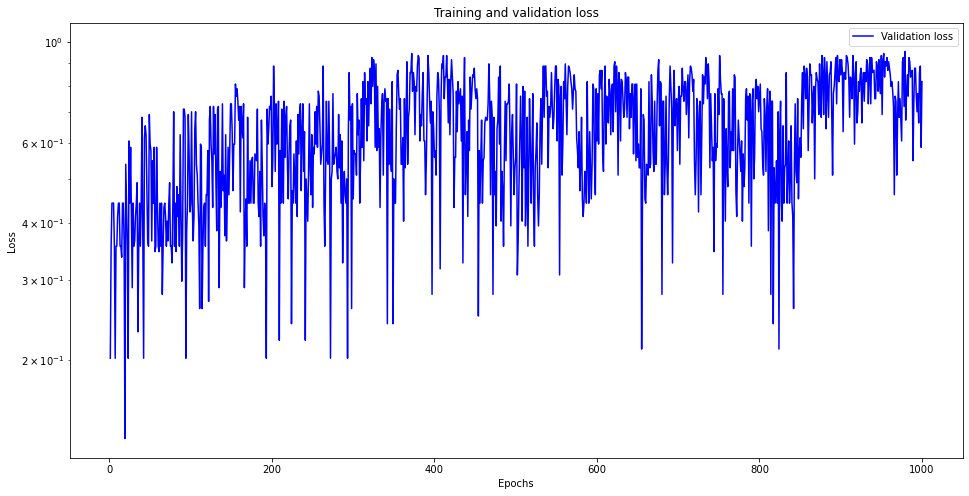

In [55]:
plt.rcParams['figure.figsize'] = [16, 8]
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, 1001)
#plt.plot(epochs, acc_values[::1], 'bo', label='Training loss')
plt.plot(epochs, val_acc_values[::1], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(0, 1.1)
#plt.xlim(0, 2000)
plt.legend()
plt.show()

In [48]:
def getAccResult(history):
    history_dict = history.history
    val_acc_values = history_dict['val_accuracy']
    print(max(val_acc_values), val_acc_values.index(max(val_acc_values)))

In [79]:
getAccResult(his_1)
getAccResult(his_01)
getAccResult(his_001)
getAccResult(his_1_norm)
getAccResult(his_01_norm)
getAccResult(his_001_norm)

0.44117647409439087 1
0.779411792755127 194
0.720588207244873 902
1.0 6
1.0 343
0.9852941036224365 325


In [81]:
def getHisAcc(history):
    history_dict = history.history
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    return acc_values, val_acc_values

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


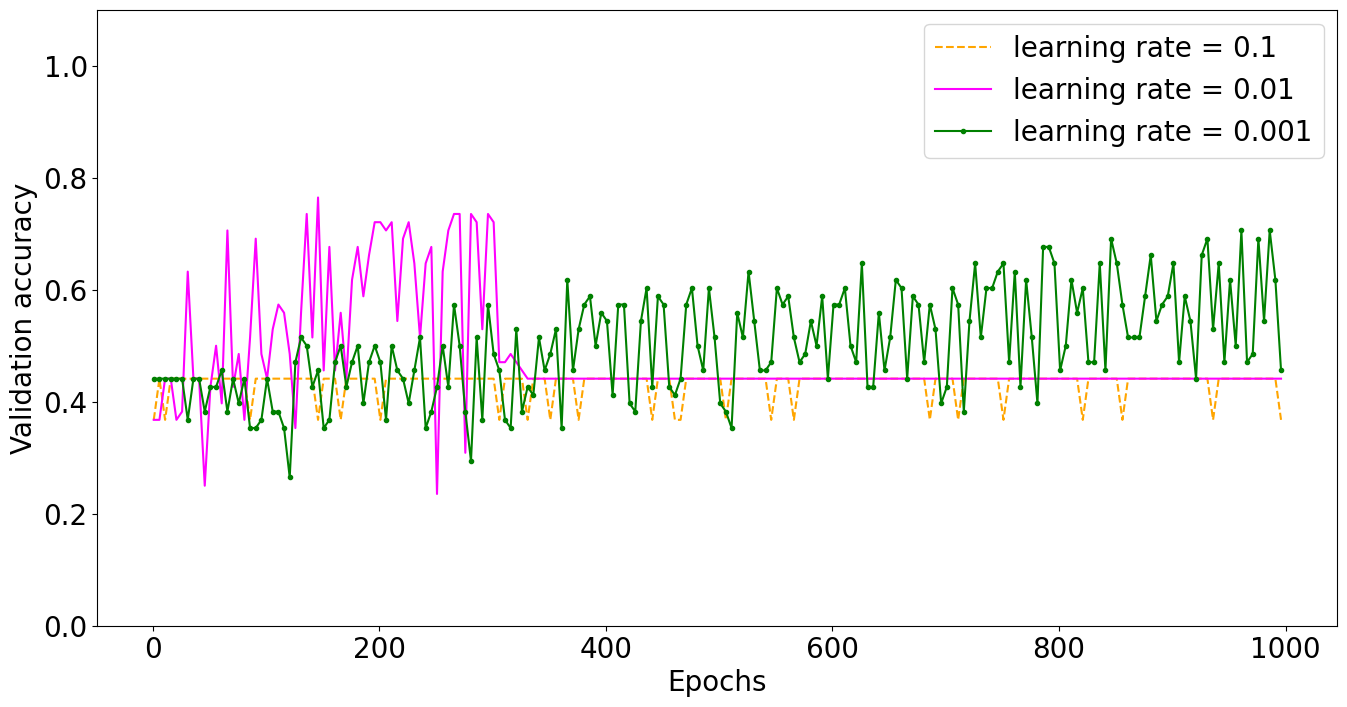

In [102]:
plt.rcParams['figure.figsize'] = [16, 8]
acc_values, val_acc_values = getHisAcc(his_1)
epochs = range(1, 1001, 5)
#plt.plot(epochs, acc_values[::1], 'bo', label='Training loss')
plt.plot(epochs, val_acc_values[::5], 'orange', label='learning rate = 0.1', linestyle='dashed')
acc_values, val_acc_values = getHisAcc(his_01)
plt.plot(epochs, val_acc_values[::5], 'magenta', label='learning rate = 0.01')
acc_values, val_acc_values = getHisAcc(his_001)
plt.plot(epochs, val_acc_values[::5], 'g', label='learning rate = 0.001', marker='.')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
#plt.yscale('log')
plt.ylim(0, 1.1)
#plt.xlim(0, 2000)
plt.legend()
plt.savefig('../pics/ANN/learning_rate_diff.svg', bbox_inches='tight')
plt.savefig('../pics/ANN/learning_rate_diff.pdf', bbox_inches='tight')
plt.show()

In [49]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
X_train.shape

(272, 9)

In [51]:
results = model.evaluate(X_test, y_test)
results

3/3 [==============================] - 0s 997us/step - loss: 0.2503 - accuracy: 0.9143


[0.2503046989440918, 0.9142857193946838]

In [72]:
save_folder = 'train_0.5_valid_0.7_test'
pd.read_csv('../data/' + save_folder + '/train_data_' + str(50) + '_Normalization.csv')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex,Species
0,1.392061,1.021516,-0.011074,-0.265259,1.291176,1.752737,-1.089118,0.0
1,0.679963,-1.221109,1.165588,0.873193,-0.754242,-0.608829,0.788672,1.0
2,-0.890306,0.348728,-1.395383,-0.635256,0.841909,0.579840,0.788672,-1.0
3,2.195454,1.470040,0.404218,-0.208337,1.769464,1.515793,-1.089118,0.0
4,0.533891,0.404794,-0.426367,-1.005253,1.835409,1.433947,0.788672,0.0
5,0.442597,-1.277175,1.373234,1.271651,-0.208951,-1.647852,-1.089118,1.0
6,0.260007,-0.772584,0.957942,1.271651,-0.284665,-1.420732,-1.089118,1.0
7,0.479114,0.797253,-0.772444,-0.834486,1.081868,1.369614,0.788672,0.0
8,-1.419815,0.348728,-0.426367,-0.834486,0.404794,-0.206549,0.788672,-1.0
9,0.314784,-1.949962,0.888726,0.531657,-1.686314,0.307420,0.788672,1.0


In [73]:
pd.read_csv('../data/' + save_folder + '/train_data_' + str(50) + '_valid.csv')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex,Species
0,-1.328520,-0.324059,-1.395383,-1.517557,0.647604,-0.329420,0.788672,-1.0
1,-1.511109,-0.548322,-0.426367,-0.948331,-0.278858,-0.430613,0.788672,-1.0
2,-0.762493,0.909384,-0.772444,0.474735,1.386608,2.108277,-1.089118,-1.0
3,-0.214725,-1.949962,0.819511,0.873193,-1.341028,-1.464155,0.788672,1.0
4,0.734739,-1.221109,0.957942,1.670110,-1.423070,0.215572,-1.089118,1.0
...,...,...,...,...,...,...,...,...
63,-0.525127,-1.949962,0.888726,0.531657,-0.935139,0.339621,0.788672,1.0
64,0.552150,-0.380125,-0.841660,-0.606795,1.672598,1.588978,0.788672,0.0
65,-0.926823,1.021516,-0.426367,-0.834486,0.838503,0.786858,0.788672,-1.0
66,-0.178207,-1.669634,0.542649,0.588580,-1.941204,0.243744,0.788672,1.0
